- 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
- 45222 if instances with unknown values are removed (train=30162, test=15060)
- Duplicate or conflicting instances : 6
- Class probabilities for adult.all file
    - Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
    - Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Prediction task is to determine whether a person makes over 50K a year.

Error Accuracy reported as follows, after removal of unknowns from train/test sets):

|     | Algorithm             | Error                                        |
|-----|-----------------------|----------------------------------------------|
| 1   | C4.5                  | 15.54                                        |
| 2   | C4.5-auto             | 14.46                                        |
| 3   | C4.5 rules            | 14.94                                        |
| 4   | Voted ID3 (0.6)       | 15.64                                        |
| 5   | Voted ID3 (0.8)       | 16.47                                        |
| 6   | T2                    | 16.84                                        |
| 7   | 1R                    | 19.54                                        |
| 8   | NBTree                | 14.10                                        |
| 9   | CN2                   | 16.00                                        |
| 10  | HOODG                 | 14.82                                        |
| 11  | FSS Naive Bayes       | 14.05                                        |
| 12  | IDTM (Decision table) | 14.46                                        |
| 13  | Naive-Bayes           | 16.12                                        |
| 14  | Nearest-neighbor (1)  | 21.42                                        |
| 15  | Nearest-neighbor (3)  | 20.35                                        |
| 16  | OC1                   | 15.04                                        |
| 17  | Pebls                 | Crashed. Unknown why (bounds WERE increased) |

Description of fnlwgt (final weight)

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of
controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous. number of years studied.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **Class**: >50K, <=50K.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Lectura y resumen de datos

In [3]:
headers = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
            "relationship","race","sex","capital-gain","capital-loss","hours-per-week",
            "native-country","CLASS"]
continuos = {"age":True,"workclass":False,"fnlwgt":True,"education":False,"education-num":True,"marital-status":False,
             "occupation":False,"relationship":False,"race":False,"sex":False,"capital-gain":True,"capital-loss":True,
             "hours-per-week":True,"native-country":False,"CLASS":False}
data = pd.read_csv("./datos/adult.data",skipinitialspace=True,header=None,names=headers)

Los valores desconocidos se representan por un `?`, lo cambiamos por np.nan (valor desconocido en pandas)

In [5]:
for col in data.columns:
    data[col] = data[col].map(lambda x: x if x!='?' else np.nan)

Describimos cada atributo mediante su media, desviación típica, valor mínimo y máximo en el caso de atributos numéricos y valores únicos y moda en el caso de los atributos continuos

In [68]:
for col in data.columns:
    print("Atributo %s:" % col)
    if(continuos[col]):
        print("\tMedia: %f, Desv. Tip: %f, Min: %f, Max: %f" % (data[col].mean(),data[col].std(),data[col].min(),data[col].max()))
    else:
        uniq = data[col].dropna().unique()
        for u in uniq:
            print("\t%s: %d" % (u,data[col].where(lambda x: x==u).count()))
        print("\tMISSING VALUES: %d" % (data[col].isnull().sum()))

Atributo age:
	Media: 38.581647, Desv. Tip: 13.640433, Min: 17.000000, Max: 90.000000
Atributo workclass:
	State-gov: 1298
	Self-emp-not-inc: 2541
	Private: 22696
	Federal-gov: 960
	Local-gov: 2093
	Self-emp-inc: 1116
	Without-pay: 14
	Never-worked: 7
	MISSING VALUES: 1836
Atributo fnlwgt:
	Media: 189778.366512, Desv. Tip: 105549.977697, Min: 12285.000000, Max: 1484705.000000
Atributo education:
	Bachelors: 5355
	HS-grad: 10501
	11th: 1175
	Masters: 1723
	9th: 514
	Some-college: 7291
	Assoc-acdm: 1067
	Assoc-voc: 1382
	7th-8th: 646
	Doctorate: 413
	Prof-school: 576
	5th-6th: 333
	10th: 933
	1st-4th: 168
	Preschool: 51
	12th: 433
	MISSING VALUES: 0
Atributo education-num:
	Media: 10.080679, Desv. Tip: 2.572720, Min: 1.000000, Max: 16.000000
Atributo marital-status:
	Never-married: 10683
	Married-civ-spouse: 14976
	Divorced: 4443
	Married-spouse-absent: 418
	Separated: 1025
	Married-AF-spouse: 23
	Widowed: 993
	MISSING VALUES: 0
Atributo occupation:
	Adm-clerical: 3770
	Exec-managerial: 

# Representación de atributos

In [32]:
data_class1 = data.where(data.CLASS=='<=50K')
data_class2 = data.where(data.CLASS=='>50K')

## age

In [8]:
X, Y = np.unique(data.age,return_counts=True)

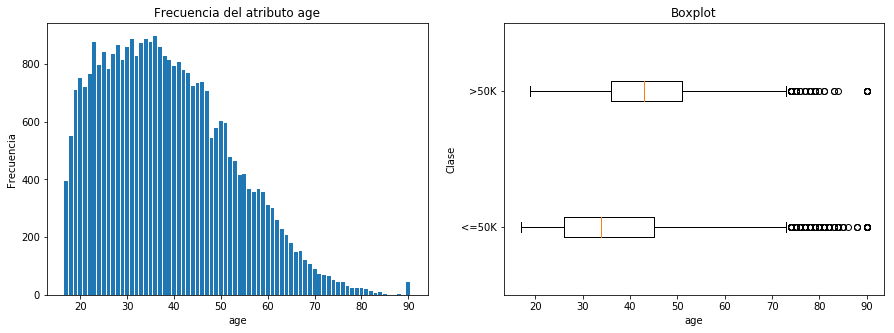

In [9]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig,(ax1, ax2) = plt.subplots(1,2)

#histograma
ax1.set_title("Frecuencia del atributo age")
ax1.set_xlabel("age")
ax1.set_ylabel("Frecuencia")
ax1.bar(X,Y)

#gráfico de caja y bigote por clases
ax2.set_title("Boxplot")
class1 = data_class1.dropna().age
class2 = data_class2.dropna().age
ax2.boxplot([class1,class2],vert=False,labels=["<=50K",">50K"])
ax2.set_xlabel("age")
ax2.set_ylabel("Clase")
plt.show()

In [10]:
data_class1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,CLASS
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En ambos gráficos se ve como los valores por encima de 70 son mucho menos frecuentes, y el boxplot muestra, además, la distribución de los valores por clase. Se puede ver que de media los ciudadanos de rentas bajas son más jóvenes que los de rentas altas.

## workclass

In [9]:
X_1, Y_1 = np.unique(data_class1.workclass.dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2.workclass.dropna(),return_counts=True)

In [10]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

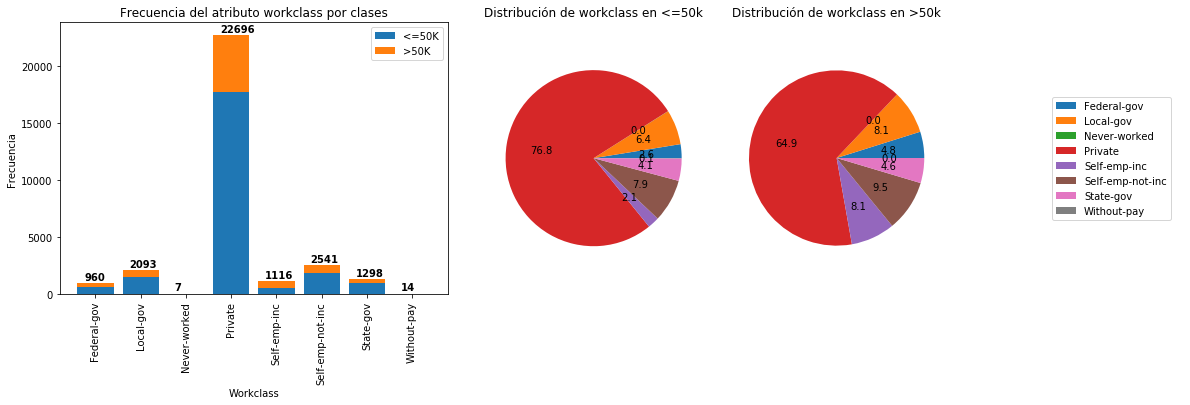

In [49]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo workclass por clases")
ax1.set_xlabel("Workclass")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
ax2.set_title("Distribución de workclass en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_title("Distribución de workclass en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Como se puede observar, `Private` es el valor más frecuente, y en ambas clases la distribución es similar

## fnlwgt

C:\Program Files (x86)\Python36-32\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


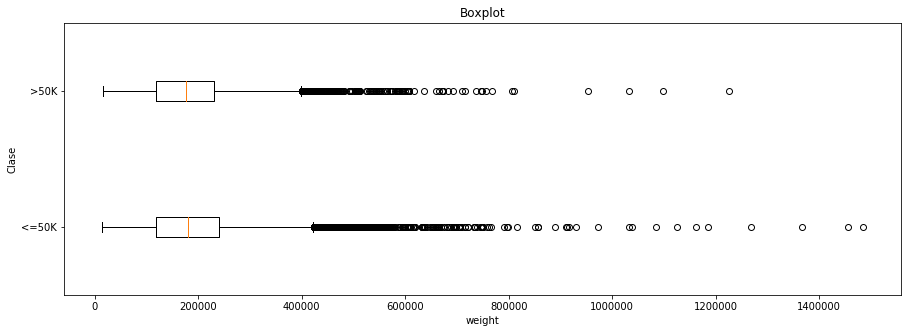

In [92]:
pylab.rcParams['figure.figsize'] = (15, 5)

#gráfico de caja y bigote por clases
plt.title("Boxplot")
class1 = data_class1.dropna().fnlwgt
class2 = data_class2.dropna().fnlwgt
plt.boxplot([class1,class2],vert=False,labels=["<=50K",">50K"])
plt.xlabel("weight")
plt.ylabel("Clase")
plt.show()

Se requiere una investigación de lo que significa este atributo antes de poder explicarlo

## education

In [8]:
X_1, Y_1 = np.unique(data_class1.education.dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2.education.dropna(),return_counts=True)

In [9]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


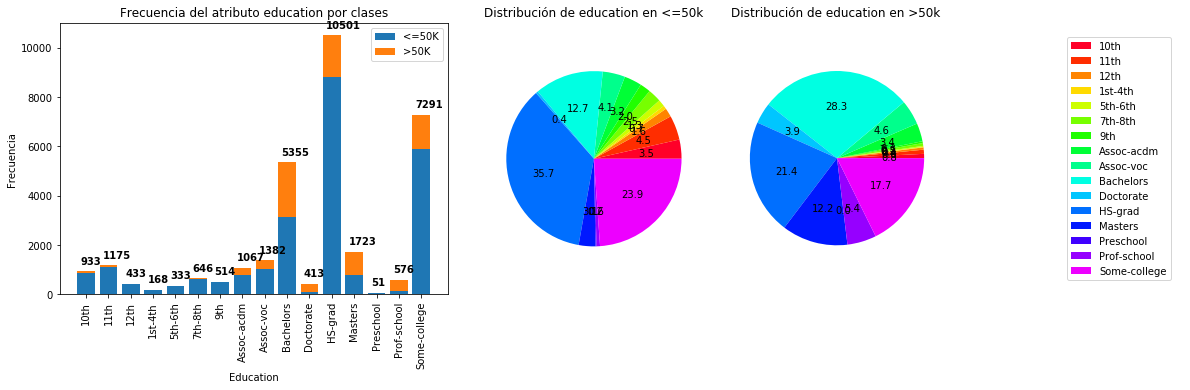

In [12]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo education por clases")
ax1.set_xlabel("Education")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
cm = plt.get_cmap('gist_rainbow')
ax2.set_color_cycle([cm(1.*i/16) for i in range(16)])

ax2.set_title("Distribución de education en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_color_cycle([cm(1.*i/16) for i in range(16)])

ax3.set_title("Distribución de education en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Como se puede observar, `High School Graduate` es el valor más frecuente, seguido de `Some-college` y `Bachelors`. En este caso, el porcentaje de `Bachelors` en sueldos altos es bastante mayor, y en sueldos menores son más significativos `7th-8th` y `11th`

También es destacable el bajo porcentaje de `Masters` y `Doctorates` en sueldos bajos.

Todo esto tiene sentido, ya que los graduados, masters y doctores se espera que tengan un mayor sueldo, mientras que habrá muy poca gente con educación superior y sueldos menores

## education-num

In [61]:
X, Y = np.unique(data["education-num"],return_counts=True)

C:\Program Files (x86)\Python36-32\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


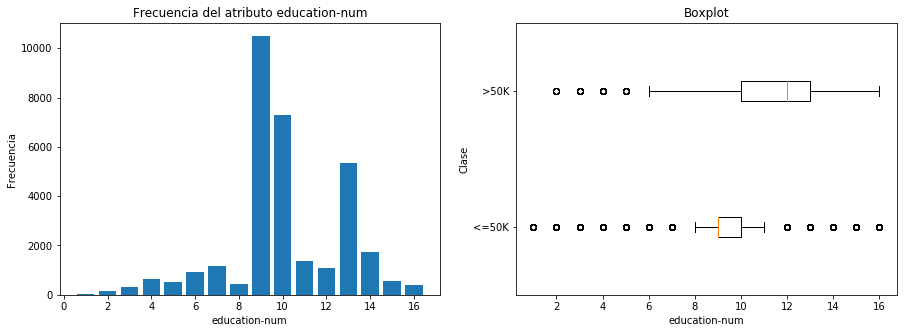

In [63]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig,(ax1, ax2) = plt.subplots(1,2)

#histograma
ax1.set_title("Frecuencia del atributo education-num")
ax1.set_xlabel("education-num")
ax1.set_ylabel("Frecuencia")
ax1.bar(X,Y)

#gráfico de caja y bigote por clases
ax2.set_title("Boxplot")
class1 = data_class1.dropna()["education-num"]
class2 = data_class2.dropna()["education-num"]
ax2.boxplot([class1,class2],vert=False,labels=["<=50K",">50K"])
ax2.set_xlabel("education-num")
ax2.set_ylabel("Clase")
plt.show()

En este atributo se ve una clara predominación por entre 9 y 10 años estudiados, con 13 siendo un número también significativo, sin embargo, por clases, se puede observar que en sueldos bajos es donde se aglomeran los primeros dos valores (9 y 10), con muy poca incidencia del resto de valores, y el sueldo superior está más repartido entre los valores, con una prevalencia de un número de años de estudio mayor

## marital-status

In [65]:
X_1, Y_1 = np.unique(data_class1["marital-status"].dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2["marital-status"].dropna(),return_counts=True)

In [68]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

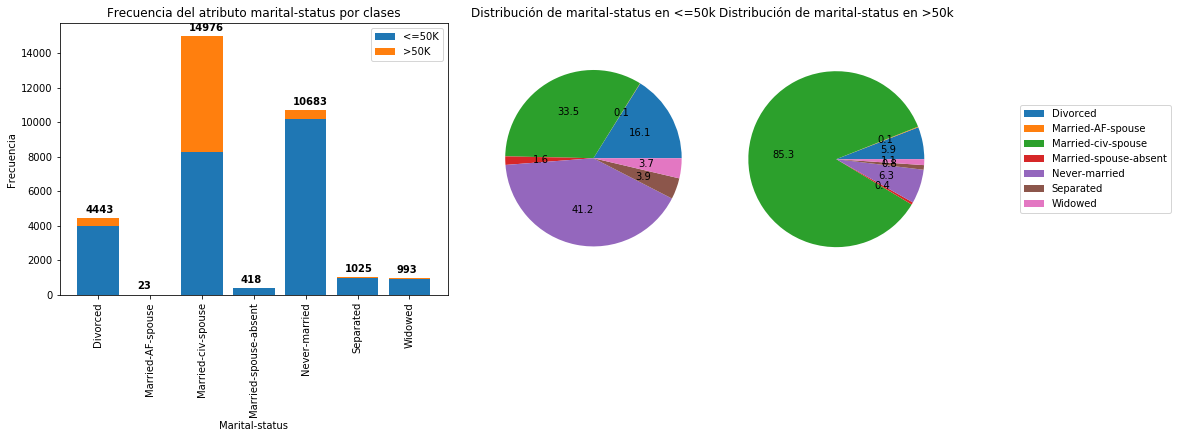

In [69]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo marital-status por clases")
ax1.set_xlabel("Marital-status")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
ax2.set_title("Distribución de marital-status en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_title("Distribución de marital-status en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Este atributo tiene unas distribuciones muy distintas entre clases, con personas con sueldos bajos siendo mayoritariamente nunca casados, seguidos de casados con pareja no militar. Sin embargo en sueldos altos la gran mayoría de peresonas están casadas con pareja no militar.

También es significativo el alto porcentaje de divorciados y viudos en sueldos bajos, comparado con sueldos altos.

## occupation

In [14]:
X_1, Y_1 = np.unique(data_class1.occupation.dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2.occupation.dropna(),return_counts=True)

In [15]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


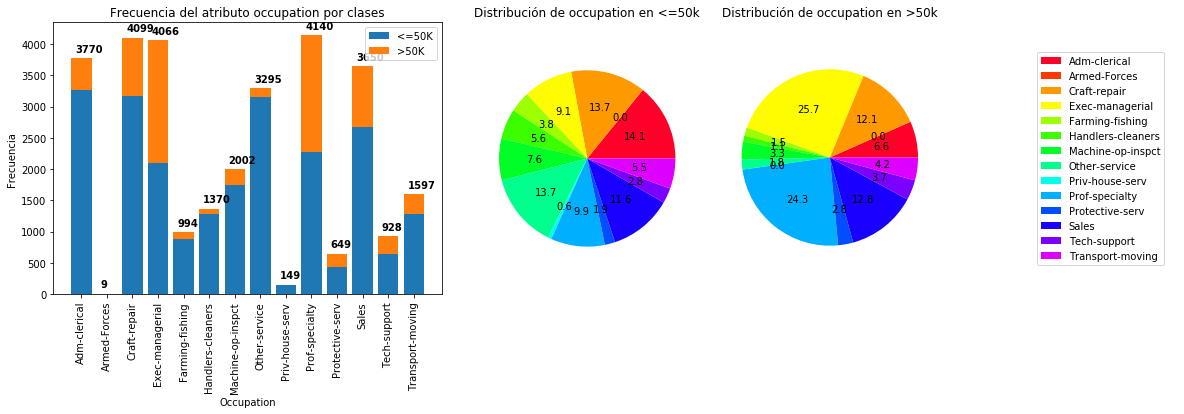

In [18]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo occupation por clases")
ax1.set_xlabel("Occupation")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+100, str(v), color='black', fontweight='bold')


cm = plt.get_cmap('gist_rainbow')
ax2.set_color_cycle([cm(1.*i/14) for i in range(14)])
    
ax2.set_title("Distribución de occupation en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_color_cycle([cm(1.*i/14) for i in range(14)])

ax3.set_title("Distribución de occupation en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Como podemos ver este atributo tiene un reparto relativamente igualitario en sueldos bajos, mientras que en sueldos altos la mayoría son `Exec-managerial`, `Prof-specialty` y `Sales`, aunque la misma proporción de este último se encuentra en sueldos bajos. 

En sueldos bajos se pueden ver algunas profesiones más comunes, como son `Adm-clerical`, `Craft-repair`, `Other-service` y `Sales`

## relationship

In [78]:
X_1, Y_1 = np.unique(data_class1.relationship.dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2.relationship.dropna(),return_counts=True)

In [81]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

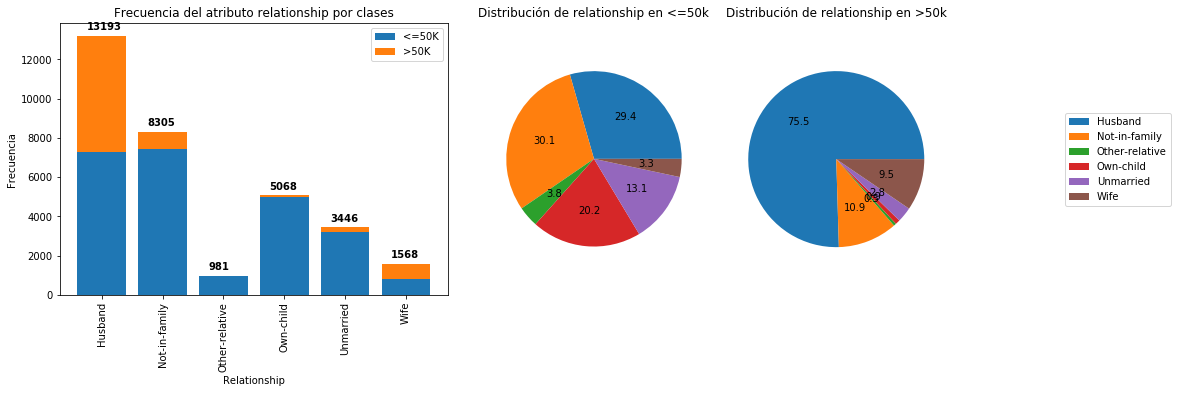

In [82]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo relationship por clases")
ax1.set_xlabel("Relationship")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
ax2.set_title("Distribución de relationship en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_title("Distribución de relationship en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Como se puede observar, en sueldos altos es muy común ser `Husband`, mientras que en sueldos bajos está repartido entre `Husband` y `Not-in-family`, con cierto porcentaje de `Own-child` y `Unmarried`. Esto claramente denota lo que ya mostraba `marital-status`, los sueldos altos se aglomeran entre personas casadas (hombres, como ya desvela este atributo), y los sueldos bajos se reparten más igualitariamente, existiendo muchos solteros y gente que no es parte de una familia.

## race

In [83]:
X_1, Y_1 = np.unique(data_class1.race.dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2.race.dropna(),return_counts=True)

In [86]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

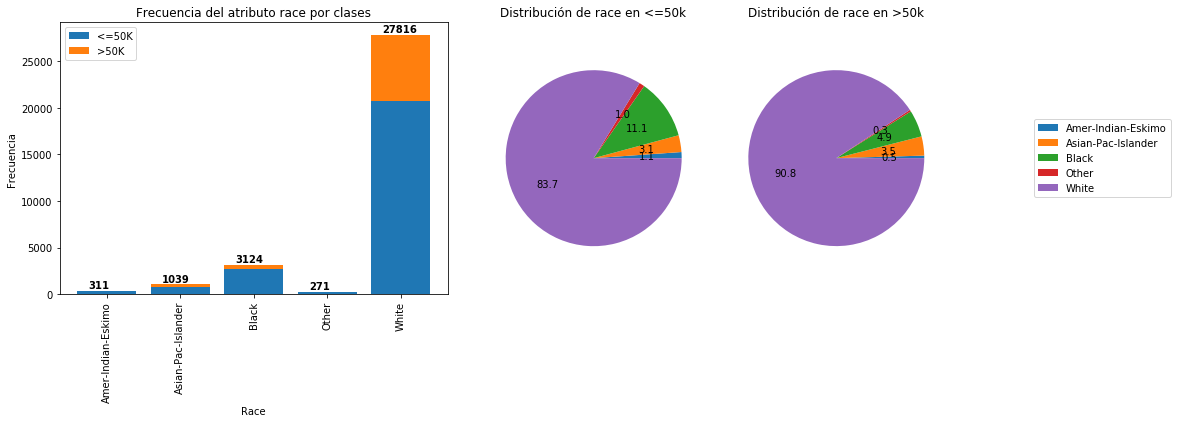

In [87]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo race por clases")
ax1.set_xlabel("Race")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
ax2.set_title("Distribución de race en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_title("Distribución de race en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Este atributo no es excesivamente significativo, ya que la mayoría de la población censada es blanca. Se puede observar una cierta mayoría de gente negra en sueldos bajos, pero no de manera demasiado significativa

## sex

In [19]:
X_1, Y_1 = np.unique(data_class1.sex.dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2.sex.dropna(),return_counts=True)

In [89]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

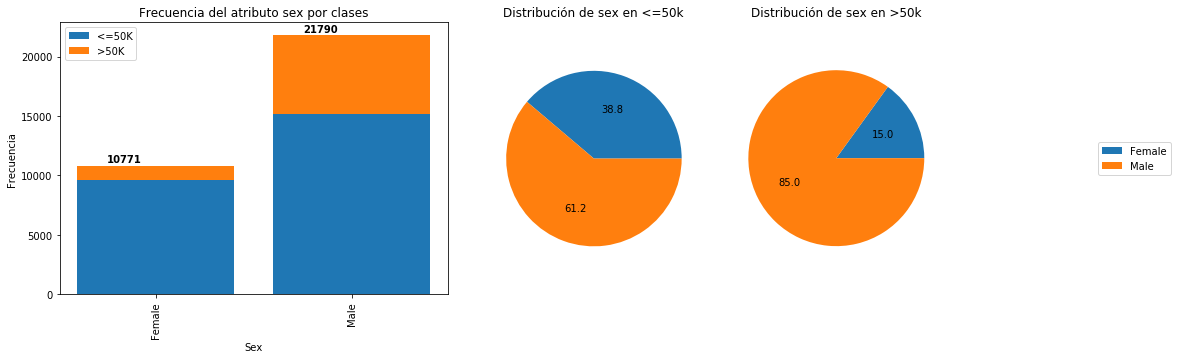

In [90]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo sex por clases")
ax1.set_xlabel("Sex")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

for i, v in enumerate(Y_1+Y_2):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
ax2.set_title("Distribución de sex en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct="%2.1f")
ax2.axis('equal')

ax3.set_title("Distribución de sex en >50k")
ax3.pie(Y_2,autopct="%2.1f")
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Como se puede observar, el sexo marca una diferencia significativa, con las mujeres formando un alto porcentaje de personas que reciben sueldo bajo, mientras que un gran porcentaje de personas con sueldo alto son hombres.

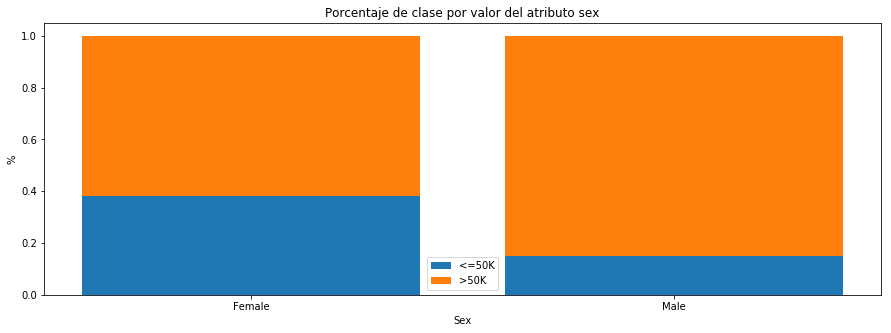

In [28]:
plt.title("Porcentaje de clase por valor del atributo sex")

female_1 = data_class1.where(data_class1.sex=="Female").dropna().age.count()
male_1 = data_class1.where(data_class1.sex=="Male").dropna().age.count()

female_2 = data_class2.where(data_class2.sex=="Female").dropna().age.count()
male_2 = data_class2.where(data_class2.sex=="Male").dropna().age.count()

y = [female_1/(female_1+male_1),female_2/(female_2+male_2)]
y2 = [male_1/(male_1+female_1),male_2/(female_2+male_2)]

plt.xlabel("Sex")
plt.ylabel("%")
plt.bar(X_1,y,label='<=50K')
plt.bar(X_2,y2,bottom=y,label='>50K')
plt.legend()

Como se puede ver, el 40% de las mujeres son de sueldo bajo, mientras que ese mismo número es de alrededor del 15% en hombres

## capital-gain

**Este atributo tiene 153 elementos que valen 999999, lo cual parece ser un error. Eliminamos esos puntos**

In [30]:
data_class2 = data_class2.where(data_class2["capital-gain"]!=99999).dropna()

In [25]:
len(data_class2.where(data_class2["capital-gain"]==99999).dropna())

148

In [28]:
data_class2.where(data_class2["capital-gain"]>0)["capital-gain"].min()

3103.0

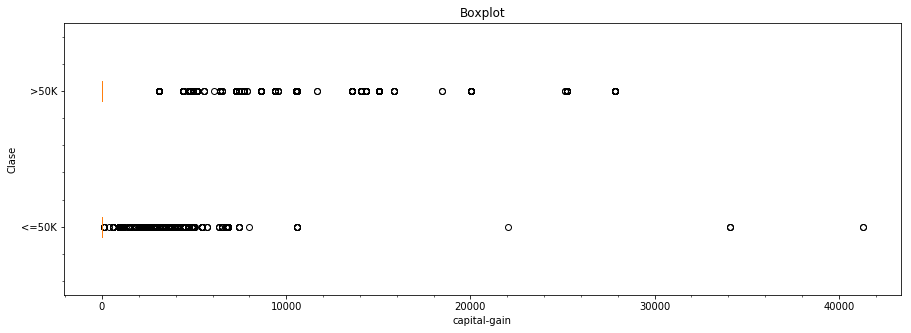

In [31]:
pylab.rcParams['figure.figsize'] = (15, 5)

#gráfico de caja y bigote por clases
plt.title("Boxplot")
class1 = data_class1.dropna()["capital-gain"]
class2 = data_class2.dropna()["capital-gain"]
plt.boxplot([class1,class2],vert=False,labels=["<=50K",">50K"])
plt.xlabel("capital-gain")
plt.ylabel("Clase")
plt.minorticks_on()
plt.show()

Se requiere una investigación de lo que significa este atributo antes de poder explicarlo

## capital-loss

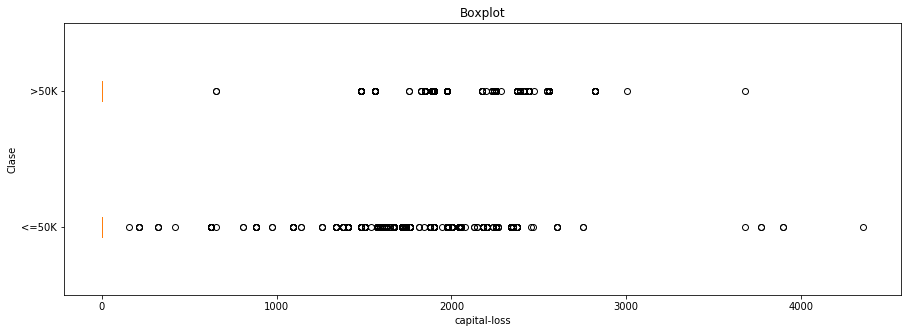

In [33]:
pylab.rcParams['figure.figsize'] = (15, 5)

#gráfico de caja y bigote por clases
plt.title("Boxplot")
class1 = data_class1.dropna()["capital-loss"]
class2 = data_class2.dropna()["capital-loss"]
plt.boxplot([class1,class2],vert=False,labels=["<=50K",">50K"])
plt.xlabel("capital-loss")
plt.ylabel("Clase")
plt.show()

Se requiere una investigación de lo que significa este atributo antes de poder explicarlo

## hours-per-week

In [34]:
X, Y = np.unique(data["hours-per-week"],return_counts=True)

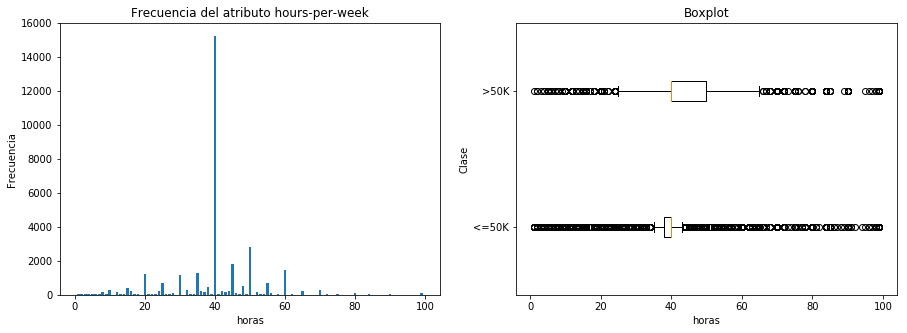

In [35]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig,(ax1, ax2) = plt.subplots(1,2)

#histograma
ax1.set_title("Frecuencia del atributo hours-per-week")
ax1.set_xlabel("horas")
ax1.set_ylabel("Frecuencia")
ax1.bar(X,Y)

#gráfico de caja y bigote por clases
ax2.set_title("Boxplot")
class1 = data_class1.dropna()['hours-per-week']
class2 = data_class2.dropna()['hours-per-week']
ax2.boxplot([class1,class2],vert=False,labels=["<=50K",">50K"])
ax2.set_xlabel("horas")
ax2.set_ylabel("Clase")
plt.show()

Se puede ver en ambos gráficos que la inmensa mayoría se sitúa en las 40 horas semanales, sobre todo en el caso de sueldos bajos. En sueldos altos este valor está más repartido, y es interesante observar que las medianas se situan, en ambos casos en 40 horas, pero en el caso de sueldos altos se trata también del primer quartil, mientras que en sueldos bajos coincide con el tercer cuartil. 

Esto indica que en sueldos altos los valores se distribuyen en y por encima de las 40 horas, mientras que en sueldos bajos en y por debajo

## native-country

In [58]:
X_1, Y_1 = np.unique(data_class1["native-country"].dropna(),return_counts=True)
X_2, Y_2 = np.unique(data_class2["native-country"].dropna(),return_counts=True)

In [59]:
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 2 con 0s
for i,x1 in enumerate(X_1):
    if(not(np.isin(x1,X_2))):
        X_2 = np.insert(X_2,i,x1)
        Y_2 = np.insert(Y_2,i,0)
        
#esta función rellena las frecuencias de valores de los atributos que no existen para la clase 1 con 0s
for i,x2 in enumerate(X_2):
    if(not(np.isin(x2,X_1))):
        X_1 = np.insert(X_1,i,x2)
        Y_1 = np.insert(Y_1,i,0)

/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


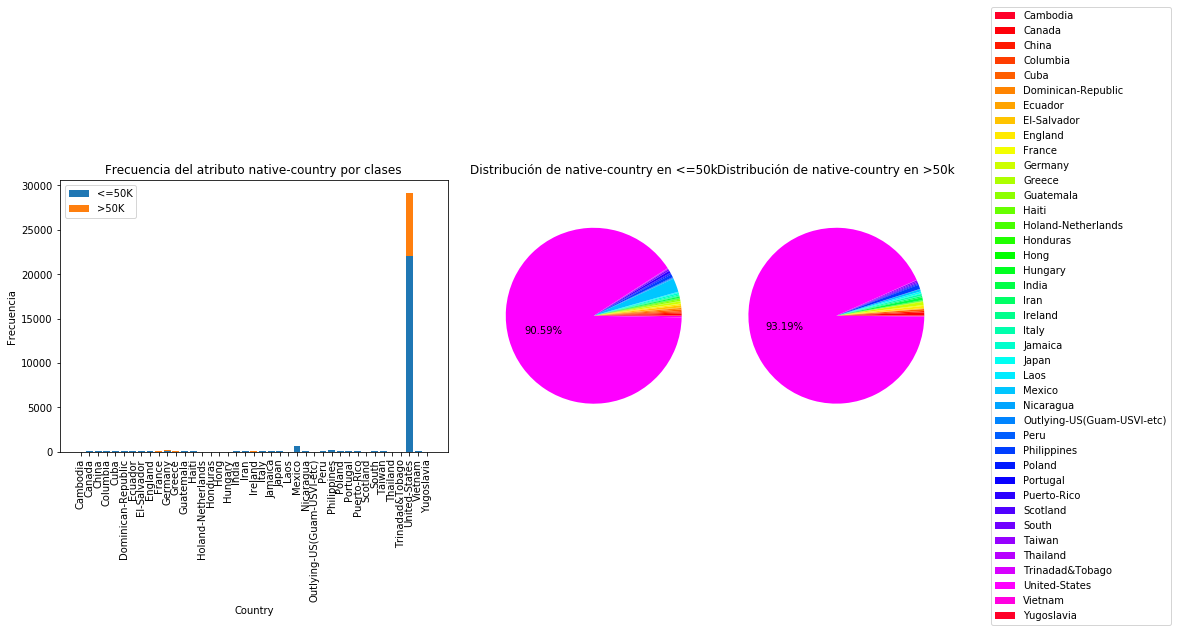

In [61]:
def my_autopct(pct):
    if(pct < 4):
        return ""
    else:
         return '{p:.2f}%'.format(p=pct)

pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma
ax1.set_title("Frecuencia del atributo native-country por clases")
ax1.set_xlabel("Country")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

    
cm = plt.get_cmap('gist_rainbow')
ax2.set_color_cycle([cm(1.*i/40) for i in range(40)])
    
ax2.set_title("Distribución de native-country en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct=my_autopct)
ax2.axis('equal')

ax3.set_color_cycle([cm(1.*i/40) for i in range(40)])

ax3.set_title("Distribución de native-country en >50k")
ax3.pie(Y_2,autopct=my_autopct)
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

Sin un primer filtrado, podemos observar que esta representación es inútil, ya que estados unidos es abrumadoramente común. Eliminamos ese país y trazamos otros gráficos:

In [62]:
Y_1 = Y_1[X_1 != "United-States"]
X_1 = X_1[X_1 != "United-States"]

Y_2 = Y_2[X_2 != "United-States"]
X_2 = X_2[X_2 != "United-States"]

In [63]:
print("Sueldos bajos:")
for x, y in zip(X_1, Y_1):
    print("\t%s: %d, %2.2f %%" % (x, y, (y/(sum(Y_1))*100)))

print("----------------------------------------------")
print("Sueldos altos:")
for x, y in zip(X_2, Y_2):
    print("\t%s: %d, %2.2f %%" % (x, y, (y/(sum(Y_2)))*100))

Sueldos bajos:
	Cambodia: 12, 0.53 %
	Canada: 82, 3.59 %
	China: 55, 2.41 %
	Columbia: 57, 2.50 %
	Cuba: 70, 3.06 %
	Dominican-Republic: 68, 2.98 %
	Ecuador: 24, 1.05 %
	El-Salvador: 97, 4.25 %
	England: 60, 2.63 %
	France: 17, 0.74 %
	Germany: 93, 4.07 %
	Greece: 21, 0.92 %
	Guatemala: 61, 2.67 %
	Haiti: 40, 1.75 %
	Holand-Netherlands: 1, 0.04 %
	Honduras: 12, 0.53 %
	Hong: 14, 0.61 %
	Hungary: 10, 0.44 %
	India: 60, 2.63 %
	Iran: 25, 1.09 %
	Ireland: 19, 0.83 %
	Italy: 48, 2.10 %
	Jamaica: 71, 3.11 %
	Japan: 38, 1.66 %
	Laos: 16, 0.70 %
	Mexico: 610, 26.71 %
	Nicaragua: 32, 1.40 %
	Outlying-US(Guam-USVI-etc): 14, 0.61 %
	Peru: 29, 1.27 %
	Philippines: 137, 6.00 %
	Poland: 48, 2.10 %
	Portugal: 33, 1.44 %
	Puerto-Rico: 102, 4.47 %
	Scotland: 9, 0.39 %
	South: 64, 2.80 %
	Taiwan: 31, 1.36 %
	Thailand: 15, 0.66 %
	Trinadad&Tobago: 17, 0.74 %
	Vietnam: 62, 2.71 %
	Yugoslavia: 10, 0.44 %
----------------------------------------------
Sueldos altos:
	Cambodia: 7, 1.34 %
	Canada: 39, 7.44 %

/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


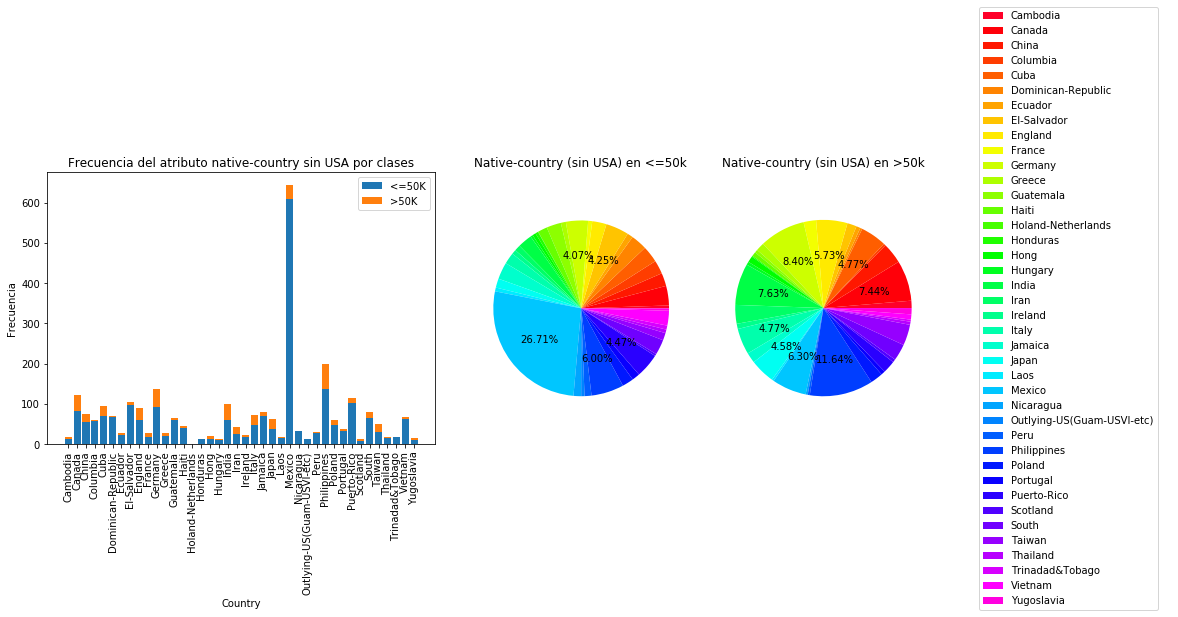

In [65]:
def make_autopct(values):
    def my_autopct(pct):
        if(pct < 4):
            return ""
        else:
            return '{p:.2f}%'.format(p=pct)
    return my_autopct

pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,gridspec_kw = {'width_ratios':[2,1,1,1]})
#histograma

ax1.set_title("Frecuencia del atributo native-country sin USA por clases")
ax1.set_xlabel("Country")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X_1,Y_1,label='<=50K')
ax1.bar(X_2,Y_2,bottom=Y_1,label='>50K')

ax1.legend()

    
cm = plt.get_cmap('gist_rainbow')
ax2.set_color_cycle([cm(1.*i/40) for i in range(40)])
    
ax2.set_title("Native-country (sin USA) en <=50k")
patches, texts, _ = ax2.pie(Y_1,autopct=make_autopct(Y_1))
ax2.axis('equal')

ax3.set_color_cycle([cm(1.*i/40) for i in range(40)])
ax3.set_title("Native-country (sin USA) en >50k")
ax3.pie(Y_2,autopct=make_autopct(Y_2))
ax3.axis('equal')
    
ax4.legend(patches,X_1,loc="right")
ax4.axis('off')
    
plt.show()

## Clase

In [66]:
X,Y=np.unique(data.CLASS,return_counts=True)

No handles with labels found to put in legend.


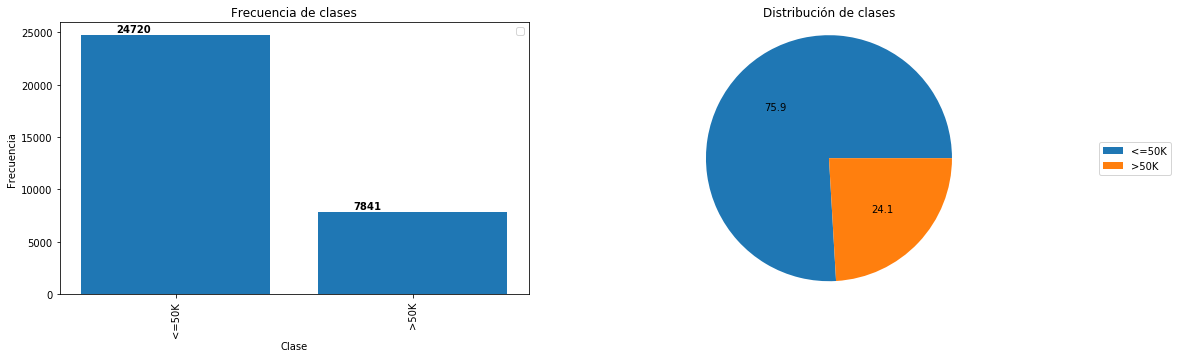

In [70]:
pylab.rcParams['figure.figsize'] = (20, 5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,gridspec_kw = {'width_ratios':[10,10,1]})
#histograma
ax1.set_title("Frecuencia de clases")
ax1.set_xlabel("Clase")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Frecuencia")
ax1.bar(X,Y)

ax1.legend()

for i, v in enumerate(Y):
    ax1.text(i-.25,v+300, str(v), color='black', fontweight='bold')
    
ax2.set_title("Distribución de clases")

patches, _, _ = ax2.pie(Y,autopct="%2.1f")
ax2.axis('equal')
    
ax3.legend(patches,X,loc="right")
ax3.axis('off')
    
plt.show()

Podemos ver una clara descompensación en las clases, sin embargo 7.841 instancias deberían ser suficientes para clasificar la clase `>50k`.